Este conjunto de datos contiene diez variables base como edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones del suero sanguíneo para 442 pacientes con diabetes, así como la respuesta de interés, una medida cuantitativa de la progresión de la enfermedad en un año.

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes(return_X_y=False)
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

Obteber el árbol de decisión óptimo para predecir la respuesta de interes a partir de los datos de los pacientes.

## Crear conjuntos de entrenamiento y de prueba 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3)

## Entrenar modelo

In [4]:
reg = DecisionTreeRegressor(max_depth=2)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

## Calcular el error

In [5]:
error = metrics.mean_squared_error(y_test, y_pred)
print(error)

4034.5781727965914


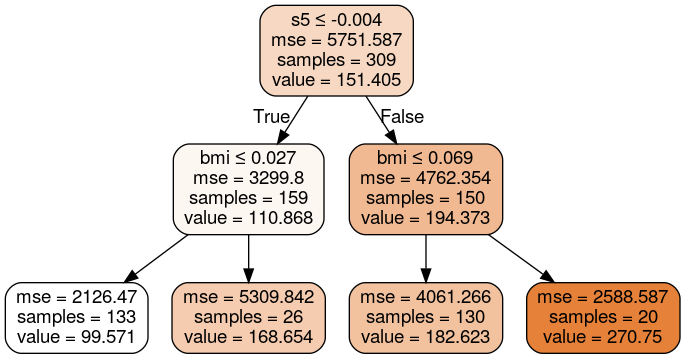

In [6]:
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = diabetes.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())